# Tensorflow
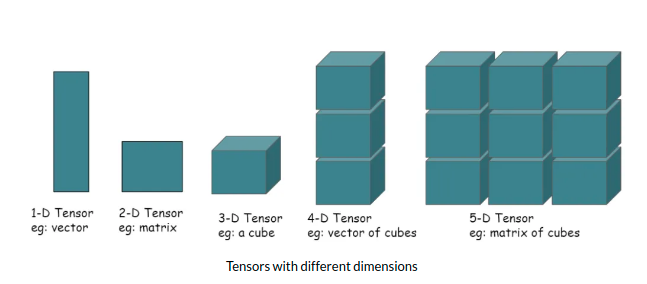

- https://www.tensorflow.org/
- https://playground.tensorflow.org/


## Installation and Setup

Install TensorFlow via pip (if not already installed):

```bash
pip install tensorflow
```

> **Note:**
> - Google Colab already has TensorFlow installed.
> - In a Jupyter Notebook, you can run `!pip install tensorflow` in a cell.

In [8]:
!pip install tensorflow

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, optimizers


from sklearn.model_selection import train_test_split

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


## Understanding Tensors

Tensors are multi-dimensional arrays and are the basic data structure in TensorFlow.

In [2]:
# Create a constant tensor
tensor_a = tf.constant([[1, 2], [3, 4]])
print("Tensor A:\n", tensor_a)

# Element-wise addition
tensor_b = tf.constant([[5, 6], [7, 8]])
sum_tensors = tf.add(tensor_a, tensor_b)
print("Sum of A and B:\n", sum_tensors)

Tensor A:
 tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
Sum of A and B:
 tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32)


## Loading and Preparing the MNIST Dataset

The MNIST dataset contains 70,000 grayscale images (28x28 pixels) of handwritten digits (0–9). We'll load the dataset from Keras.

In [3]:
# Load MNIST data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

print("Full training set shape:", X_train_full.shape, y_train_full.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Full training set shape: (60000, 28, 28) (60000,)
Test set shape: (10000, 28, 28) (10000,)


In [4]:
print(X_train_full.max(), X_train_full.min())
print(X_test.max(), X_test.min())

255 0
255 0


## Data Exploration and Visualization

Let's explore the data by checking the label distribution and visualizing some sample images.

In [5]:
print("տիեզերագնաց չի")

տիեզերագնաց չի


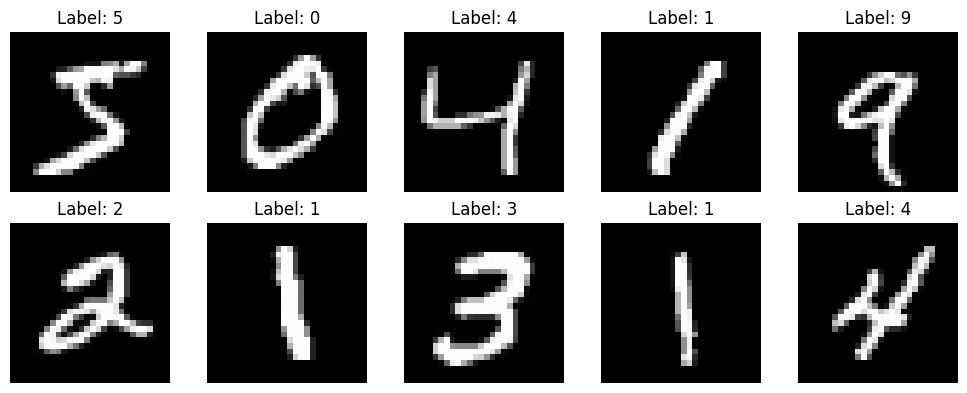

In [6]:
# Visualize some sample images from the training set
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_full[i], cmap='gray')
    plt.title(f"Label: {y_train_full[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
# Display label distribution in the full training set
unique, counts = np.unique(y_train_full, return_counts=True)
print("Label distribution in full training set:")
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} samples | {count / len(y_train_full) * 100:.2f}%")

Label distribution in full training set:
Digit 0: 5923 samples | 9.87%
Digit 1: 6742 samples | 11.24%
Digit 2: 5958 samples | 9.93%
Digit 3: 6131 samples | 10.22%
Digit 4: 5842 samples | 9.74%
Digit 5: 5421 samples | 9.04%
Digit 6: 5918 samples | 9.86%
Digit 7: 6265 samples | 10.44%
Digit 8: 5851 samples | 9.75%
Digit 9: 5949 samples | 9.92%


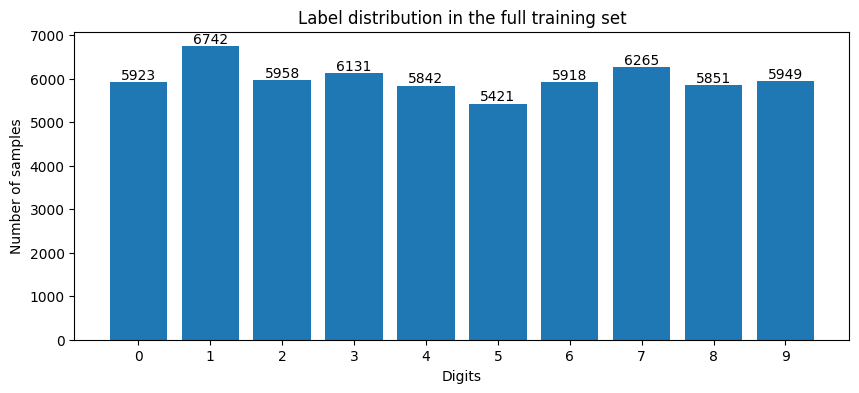

In [8]:

# bar plot of label distribution
plt.figure(figsize=(10, 4))
plt.bar(unique, counts)
plt.xlabel('Digits')
plt.ylabel('Number of samples')
plt.title('Label distribution in the full training set')
plt.xticks(unique)
# add number of samples on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

## Train/Validation/Test Split and Preprocessing

We split the full training set into a training set and a validation set (e.g., 80% training, 20% validation) and then preprocess the images by normalizing pixel values and flattening each image into a 784-dimensional vector.

In [9]:
# Split the full training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=1
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (48000, 28, 28)
Validation set shape: (12000, 28, 28)


In [10]:
# Flatten images (28x28 -> 784) and normalize pixel values to [0, 1]
def preprocess_images(X):
    X = X.reshape(-1, 28 * 28)  # Flatten images
    return X / 255.0           # Normalize

X_train = preprocess_images(X_train)
X_val   = preprocess_images(X_val)
X_test  = preprocess_images(X_test)

print("Flattened training set shape:", X_train.shape)
print("Flattened validation set shape:", X_val.shape)
print("Flattened test set shape:", X_test.shape)

Flattened training set shape: (48000, 784)
Flattened validation set shape: (12000, 784)
Flattened test set shape: (10000, 784)


In [11]:
# check whether the data is normalized
print("Min pixel value:", X_train.min())
print("Max pixel value:", X_train.max())
# test and val
print("Min pixel value:", X_val.min())
print("Max pixel value:", X_val.max())
# test
print("Min pixel value:", X_test.min())
print("Max pixel value:", X_test.max())

Min pixel value: 0.0
Max pixel value: 1.0
Min pixel value: 0.0
Max pixel value: 1.0
Min pixel value: 0.0
Max pixel value: 1.0


## Building a Neural Network

We now define a simple feed-forward neural network with an input layer of size 784, two hidden layers, and an output layer with 10 neurons (one per digit).

### Config

In [28]:
NEURONS_LAYER_1 = 8
NEURONS_LAYER_2 = 128
DROPOUT = 0.2
L2_REGULARIZATION = 0.001
# LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 128

# power of 2s - https://datascience.stackexchange.com/questions/20179/what-is-the-advantage-of-keeping-batch-size-a-power-of-2/20193

In [29]:
# Basic model without regularization (for comparison)
model = keras.Sequential([
    layers.Dense(NEURONS_LAYER_1, activation='relu', input_shape=(28*28,)),
    layers.Dense(NEURONS_LAYER_2, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

c:\Users\hayk_\.conda\envs\100\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,722 (34.07 KB)

 Trainable params: 8,722 (34.07 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# plot model architecture
# pip install pydot and we also need graphviz
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## Adding Regularization and Dropout

To reduce overfitting, we add L2 weight regularization and dropout layers. This version of the model will be used for training.

In [32]:
model = keras.Sequential([
    layers.Dense(NEURONS_LAYER_1, activation='relu', input_shape=(784,),
                 kernel_regularizer=regularizers.l2(L2_REGULARIZATION)),
    layers.Dropout(DROPOUT),  # Drop 20% of neurons during training
    layers.Dense(NEURONS_LAYER_2, activation='relu', 
                 kernel_regularizer=regularizers.l2(L2_REGULARIZATION)),
    layers.Dropout(DROPOUT),
    layers.Dense(10, activation='softmax')
])

model.summary()

c:\Users\hayk_\.conda\envs\100\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,722 (34.07 KB)

 Trainable params: 8,722 (34.07 KB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

We compile the model by specifying the loss function, optimizer, and metrics. Since the labels are integers (0–9), we use `sparse_categorical_crossentropy`.

**Notes:**
- When you call the compile() method on a Keras model, you can pass a list (or a single item). These metrics are functions or objects that compute performance measures during training and evaluation. They don't affect the training process (which is driven by the loss function) but serve as additional diagnostics to monitor how well your model is performing.
- Adam - https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [33]:
model.compile(
    loss='sparse_categorical_crossentropy',
    # optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
    optimizer="Adam", # RmsProp, Momentum
    metrics=['accuracy'],
)

# model.compile(
#     loss='sparse_categorical_crossentropy',
#     optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
#     metrics=['accuracy'],
# )


## Training the Model

We train the model on the training set while validating on the validation set.

In [34]:
model_to_use = model#_reg_dropout

early_stopping = keras.callbacks.EarlyStopping(patience=10, 
                                               min_delta=0.01,
                                               
                                               restore_best_weights=True)


In [36]:
history = model_to_use.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS, # int(EPOCHS * 1.5),
    batch_size=BATCH_SIZE,
    # callbacks=[early_stopping, 
    #            keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, verbose=1),
    #            keras.callbacks.ModelCheckpoint('mnist_model.keras', save_best_only=True)],
    verbose=1, 
)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4738 - loss: 1.5430 - val_accuracy: 0.8725 - val_loss: 0.5167
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7417 - loss: 0.7976 - val_accuracy: 0.8899 - val_loss: 0.4581
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7744 - loss: 0.7242 - val_accuracy: 0.8891 - val_loss: 0.4532
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7829 - loss: 0.7072 - val_accuracy: 0.8980 - val_loss: 0.4229
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7894 - loss: 0.6896 - val_accuracy: 0.8947 - val_loss: 0.4292
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8037 - loss: 0.6641 - val_accuracy: 0.8987 - val_loss: 0.4199
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8120 - loss: 0.6469 - val_accuracy: 0.8975 - val_loss: 0.4190
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8125 - loss: 0.6264 - val_accuracy: 0

## Training plots

In [45]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

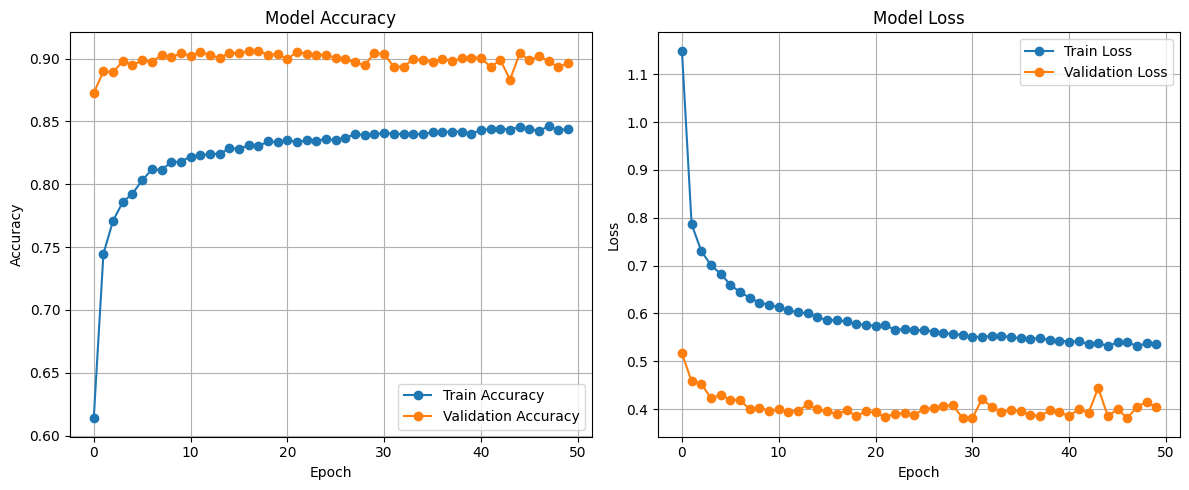

In [37]:
plt.figure(figsize=(12, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

## Evaluating the Model

In [38]:
# Evaluate model on test set
test_loss, test_accuracy = model_to_use.evaluate(X_test, y_test, verbose=0)

train_loss, train_accuracy = model_to_use.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model_to_use.evaluate(X_val, y_val, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f} | Validation Accuracy: {val_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f}")
print(f"Train Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f} | Test Loss: {test_loss:.4f}")

Train Accuracy: 0.9053 | Validation Accuracy: 0.8967 | Test Accuracy: 0.9000
Train Loss: 0.3850 | Validation Loss: 0.4039 | Test Loss: 0.3926


## Making Predictions

We use the trained model to predict the class labels on the test set.

In [40]:
predictions = model_to_use.predict(X_test)
print(predictions[1])
predicted_classes = np.argmax(predictions, axis=1)

print("Predicted digit labels (first 10):", predicted_classes[:10])
print("True digit labels (first 10):     ", y_test[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3.8121925e-03 3.5927034e-04 9.5507443e-01 1.7451331e-02 2.6554169e-06
 1.1364765e-02 5.4909958e-04 8.7217759e-06 1.1372941e-02 4.5570996e-06]
Predicted digit labels (first 10): [7 2 1 0 9 1 4 9 4 9]
True digit labels (first 10):      [7 2 1 0 4 1 4 9 5 9]


## Misclassified images

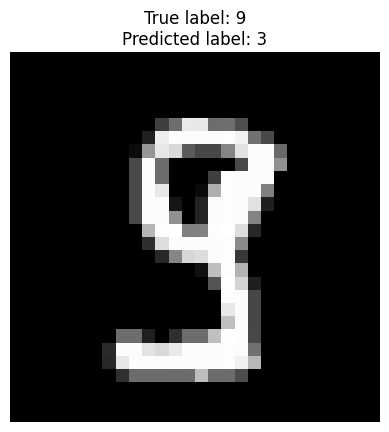

In [49]:
# Display some misclassified images
misclassified_idx = np.where(predicted_classes != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title(f"True label: {y_test[i]}\nPredicted label: {predicted_classes[i]}")
plt.axis('off')
plt.show()

In [ ]:
!pip install seaborn

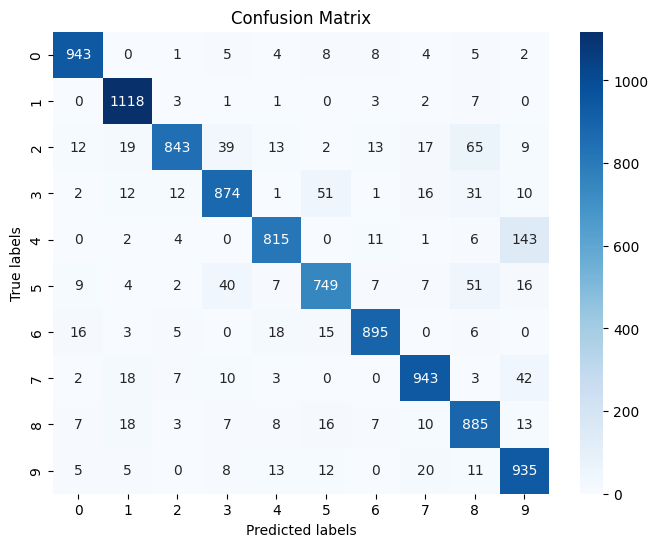

In [50]:
import seaborn as sns

# Get matrix of confusion
confusion_matrix = tf.math.confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


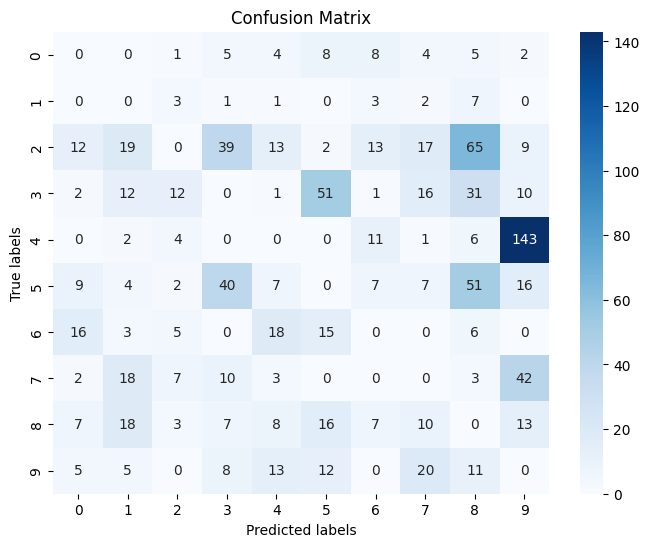

In [51]:
import seaborn as sns

# Convert confusion matrix to NumPy array and set the diagonal to zero
confusion_matrix_np = confusion_matrix.numpy()
np.fill_diagonal(confusion_matrix_np, 0)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_np, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Saving and Loading the Model

We save the trained model to disk and then demonstrate how to load it back.

In [52]:
# Saving the model
model.save("mnist_model.h5")
print("Model saved to mnist_model.h5")

# Loading the model
loaded_model = keras.models.load_model("mnist_model.h5")
print("Loaded model from mnist_model.h5")

# Verify loaded model performance
loaded_loss, loaded_accuracy = loaded_model.evaluate(X_test, y_test, verbose=0)
print("Loaded model Test Loss:", loaded_loss)
print("Loaded model Test Accuracy:", loaded_accuracy)

Model saved to mnist_model.h5
Loaded model from mnist_model.h5
Loaded model Test Loss: 0.3925747573375702
Loaded model Test Accuracy: 0.8999999761581421


# Experiment tracking


Experiment tracking is the process of logging and visualizing important information about your model training—such as loss, accuracy, hyperparameters, and even model artifacts—to help you compare different runs and reproduce results.

Two of the most popular tools for experiment tracking are:

#### TensorBoard
Developed by the TensorFlow team
- [TensorBoard Documentation](https://www.tensorflow.org/tensorboard)

#### Weights & Biases (W&B)
Some Armenian works there
- [Weights & Biases Homepage](https://www.wandb.com/)
#### Aim hub
Made in Armenia
- [Aim hub Homepage](https://aimhub.ai/)

## Next Steps and Further Reading

- **Experiment with Architecture:** Try adding more layers or neurons.
- **Hyperparameter Tuning:** Adjust learning rates, batch sizes, or regularization strengths.
- **Advanced Models:** Explore Convolutional Neural Networks (CNNs) for image data.
- **Additional Techniques:** Consider using early stopping, initialization or batch normalization for improved performance.
- **Documentation:** Visit the [TensorFlow documentation](https://www.tensorflow.org/api_docs) for more details.

## TensorBoard Tracking

TensorBoard is a tool for visualizing metrics during training. We'll use it to log training and validation metrics.

In [53]:
# Set up TensorBoard callback
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [54]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping, 
               keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, verbose=1),
               keras.callbacks.ModelCheckpoint('mnist_model.keras', save_best_only=True),
               tensorboard_callback],
    verbose=1, 
)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8434 - loss: 0.5411 - val_accuracy: 0.8997 - val_loss: 0.3861 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8466 - loss: 0.5282 - val_accuracy: 0.8988 - val_loss: 0.3923 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8459 - loss: 0.5294 - val_accuracy: 0.9008 - val_loss: 0.3776 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8492 - loss: 0.5272 - val_accuracy: 0.9018 - val_loss: 0.3973 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8489 - loss: 0.5201 - val_accuracy: 0.8980 - val_loss: 0.4007 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8479 - loss: 0.5245
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8479 - loss: 0.5245 - 

## Launch TensorBoard

To visualize the logs, run the following command in your terminal:
```bash
tensorboard --logdir logs/fit
```
Then open the provided URL in your browser.

In [36]:
%tensorboard

UsageError: Line magic function `%tensorboard` not found.


In [37]:
%load_ext tensorboard
%tensorboard --logdir logs/


In [ ]:
import wandb
from wandb.integration.keras import WandbCallback

# Initialize W&B (login on first run)
wandb.init(
    project="mnist-demo",
    config={
        "epochs": EPOCHS,
        "batch_size": BATCH_SIZE,
        "architecture": "Dense-NN"
    }
)

# Train with W&B callback
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # Reduced for demo
    batch_size=BATCH_SIZE,
    callbacks=[WandbCallback()],
    verbose=1
)

# Finish the run
wandb.finish()

In [ ]:
# !pip install wandb

## Weights & Biases (W&B) - Quick Demo

Weights & Biases is an experiment tracking tool. Some Armenians work there!

**Resources:**
- [W&B Homepage](https://wandb.ai)
- [W&B Documentation](https://docs.wandb.ai/)

## Key Differences: TensorFlow/Keras vs PyTorch

| Aspect | TensorFlow/Keras | PyTorch |
|--------|------------------|---------|
| **API Style** | High-level, declarative | More low-level, imperative |
| **Model Definition** | Sequential or Functional API | Class-based (nn.Module) |
| **Training** | `model.fit()` handles everything | Manual training loops |
| **Debugging** | Less intuitive | More Pythonic, easier debugging |
| **Dynamic Graphs** | Static by default (eager in TF 2.x) | Dynamic computation graphs |
| **Deployment** | TensorFlow Serving, TF Lite | TorchScript, ONNX |
| **Learning Curve** | Easier for beginners | Steeper but more flexible |
| **Research** | Good for production | Very popular in research |

**When to use TensorFlow/Keras:**
- Quick prototyping
- Production deployment at scale
- Mobile/embedded devices (TF Lite)
- Prefer high-level APIs

**When to use PyTorch:**
- Research and experimentation
- Need fine-grained control
- Dynamic architectures (RNNs with variable lengths)
- Prefer writing custom training loops

In [ ]:
# Save the model
torch.save(model_pytorch.state_dict(), 'mnist_model_pytorch.pth')
print("Model saved to mnist_model_pytorch.pth")

# Load the model
loaded_model = MNISTNet(
    neurons_layer_1=NEURONS_LAYER_1,
    neurons_layer_2=NEURONS_LAYER_2,
    dropout=DROPOUT
).to(device)
loaded_model.load_state_dict(torch.load('mnist_model_pytorch.pth'))
loaded_model.eval()

# Verify loaded model
test_loss_loaded, test_acc_loaded = validate(loaded_model, test_loader, criterion, device)
print(f"Loaded model Test Accuracy: {test_acc_loaded:.4f}")
print(f"Loaded model Test Loss: {test_loss_loaded:.4f}")

## Save and Load PyTorch Model

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, all_predictions)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('PyTorch Model - Confusion Matrix')
plt.show()

## Confusion Matrix

In [ ]:
# Get predictions for test set
model_pytorch.eval()
all_predictions = []

with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model_pytorch(inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

all_predictions = np.array(all_predictions)

print("Predicted labels (first 10):", all_predictions[:10])
print("True labels (first 10):     ", y_test[:10])

## Make Predictions

In [ ]:
# Evaluate on all sets
train_loss_final, train_acc_final = validate(model_pytorch, train_loader, criterion, device)
val_loss_final, val_acc_final = validate(model_pytorch, val_loader, criterion, device)
test_loss_final, test_acc_final = validate(model_pytorch, test_loader, criterion, device)

print(f"Train Accuracy: {train_acc_final:.4f} | Val Accuracy: {val_acc_final:.4f} | Test Accuracy: {test_acc_final:.4f}")
print(f"Train Loss: {train_loss_final:.4f} | Val Loss: {val_loss_final:.4f} | Test Loss: {test_loss_final:.4f}")

## Evaluate on Test Set

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_pytorch['train_acc'], label='Train Accuracy', marker='o')
plt.plot(history_pytorch['val_acc'], label='Validation Accuracy', marker='o')
plt.title('PyTorch Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_pytorch['train_loss'], label='Train Loss', marker='o')
plt.plot(history_pytorch['val_loss'], label='Validation Loss', marker='o')
plt.title('PyTorch Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

## Plot Training History

In [ ]:
# Training configuration
num_epochs = 20

# History tracking
history_pytorch = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': []
}

# Training loop
for epoch in range(num_epochs):
    # Train
    train_loss, train_acc = train_epoch(model_pytorch, train_loader, criterion, optimizer, device)
    
    # Validate
    val_loss, val_acc = validate(model_pytorch, val_loader, criterion, device)
    
    # Save history
    history_pytorch['train_loss'].append(train_loss)
    history_pytorch['train_acc'].append(train_acc)
    history_pytorch['val_loss'].append(val_loss)
    history_pytorch['val_acc'].append(val_acc)
    
    # Print progress
    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

print("\nTraining complete!")

## Train the Model

In [ ]:
def train_epoch(model, loader, criterion, optimizer, device):
    """Train for one epoch"""
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

def validate(model, loader, criterion, device):
    """Validate the model"""
    model.eval()  # Set model to evaluation mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():  # No gradient computation
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Statistics
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

## Training Loop

PyTorch requires us to write explicit training loops:

In [ ]:
# Loss function (CrossEntropyLoss includes softmax)
criterion = nn.CrossEntropyLoss()

# Optimizer with L2 regularization (weight_decay)
optimizer = optim.Adam(
    model_pytorch.parameters(),
    lr=0.001,
    weight_decay=L2_REGULARIZATION
)

print("Loss function:", criterion)
print("Optimizer:", optimizer)

## Define Loss Function and Optimizer

In [ ]:
class MNISTNet(nn.Module):
    def __init__(self, neurons_layer_1=128, neurons_layer_2=128, dropout=0.2):
        super(MNISTNet, self).__init__()
        
        # Define layers
        self.fc1 = nn.Linear(784, neurons_layer_1)
        self.dropout1 = nn.Dropout(dropout)
        
        self.fc2 = nn.Linear(neurons_layer_1, neurons_layer_2)
        self.dropout2 = nn.Dropout(dropout)
        
        self.fc3 = nn.Linear(neurons_layer_2, 10)
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Forward pass
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        return x

# Create model instance
model_pytorch = MNISTNet(
    neurons_layer_1=NEURONS_LAYER_1,
    neurons_layer_2=NEURONS_LAYER_2,
    dropout=DROPOUT
).to(device)

# Print model architecture
print(model_pytorch)

# Count parameters
total_params = sum(p.numel() for p in model_pytorch.parameters())
print(f"\nTotal parameters: {total_params:,}")

## Define the Neural Network Model

In PyTorch, we define models as classes inheriting from `nn.Module`:

In [ ]:
# Create datasets
train_dataset = TensorDataset(X_train_torch, y_train_torch)
val_dataset = TensorDataset(X_val_torch, y_val_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")

## Create DataLoaders

DataLoaders handle batching and shuffling:

In [ ]:
# Convert numpy arrays to PyTorch tensors
X_train_torch = torch.FloatTensor(X_train).to(device)
y_train_torch = torch.LongTensor(y_train).to(device)

X_val_torch = torch.FloatTensor(X_val).to(device)
y_val_torch = torch.LongTensor(y_val).to(device)

X_test_torch = torch.FloatTensor(X_test).to(device)
y_test_torch = torch.LongTensor(y_test).to(device)

print("Training data shape:", X_train_torch.shape)
print("Training labels shape:", y_train_torch.shape)

## Prepare Data for PyTorch

PyTorch works with tensors, so we'll convert our numpy arrays to PyTorch tensors:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

# Check PyTorch version and device
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

## Import PyTorch Libraries

In [ ]:
# !pip install torch torchvision

## Installation

---

# PyTorch Implementation

PyTorch is another popular deep learning framework developed by Meta (Facebook).

![PyTorch](https://pytorch.org/assets/images/pytorch-logo.png)

**Resources:**
- [PyTorch Homepage](https://pytorch.org/)
- [PyTorch Documentation](https://pytorch.org/docs/)
- [PyTorch Tutorials](https://pytorch.org/tutorials/)